# Simple Softmax Demo Using MXNET

This notebook compares the mxnet and numpy versions of the python toolbox on the basis of the first few modules translated from numpy to mxnet.

In [1]:
import numpy as np
import time

from modules import Sequential as Sequential_np
from modules import SoftMax    as SoftMax_np
from modules import Linear     as Linear_np

import matplotlib.pyplot as plt

import data_io
# mxnet:
import mxnet as mx
from mxnet import ndarray as nd

from mxmodules import Sequential
from mxmodules import SoftMax
from mxmodules import Linear

In [2]:
Xtrain = data_io.read('../data/MNIST/train_images.npy')
Ytrain = data_io.read('../data/MNIST/train_labels.npy')

Xtest = data_io.read('../data/MNIST/test_images.npy')
Ytest = data_io.read('../data/MNIST/test_labels.npy')

#transfer the pixel values from [0 255] to [-1 1]
Xtrain = Xtrain / 127.5 -1
Xtest = Xtest / 127.5 -1

#transform numeric class labels to indicator vectors.
I = Ytrain[:,0].astype(int)
Ytrain = np.zeros([Xtrain.shape[0],np.unique(Ytrain).size])
Ytrain[np.arange(Ytrain.shape[0]),I] = 1

I = Ytest[:,0].astype(int)
Ytest = np.zeros([Xtest.shape[0],np.unique(Ytest).size])
Ytest[np.arange(Ytest.shape[0]),I] = 1

loading np-formatted data from ../data/MNIST/train_images.npy
loading np-formatted data from ../data/MNIST/train_labels.npy
loading np-formatted data from ../data/MNIST/test_images.npy
loading np-formatted data from ../data/MNIST/test_labels.npy


### Train MXNET Implementation

In [3]:
# choose context
var_ctx = 'gpu'

if var_ctx == 'gpu':
    ctx = mx.gpu()
else:
    ctx = mx.cpu()

sm_classifier_mx = Sequential([Linear(28*28, 10, ctx=ctx), SoftMax(ctx=ctx)])

In [4]:
Xtrain_mx = nd.array(Xtrain, ctx=ctx)
Ytrain_mx = nd.array(Ytrain, ctx=ctx)
Xtest_mx  = nd.array(Xtest,  ctx=ctx)
Ytest_mx  = nd.array(Ytest,  ctx=ctx)

In [5]:
strt = time.time()

sm_classifier_mx.train( X=Xtrain_mx,\
                        Y=Ytrain_mx,\
                        Xval=None,\
                        Yval=None,\
                        iters=10000,\
                        lrate=0.001,\
                        batchsize=100,
                        status=5000)

stp = time.time()

train_time_mx = stp-strt

print('MXNET: Trained simple SM classifier in {}s'.format(train_time_mx))

batch# 500, lrate 0.001, l1-loss 0.9051
batch# 1000, lrate 0.001, l1-loss 0.6851
batch# 1500, lrate 0.001, l1-loss 0.6404
batch# 2000, lrate 0.001, l1-loss 0.476
batch# 2500, lrate 0.001, l1-loss 0.5454
batch# 3000, lrate 0.001, l1-loss 0.4351
batch# 3500, lrate 0.001, l1-loss 0.507
batch# 4000, lrate 0.001, l1-loss 0.4135
batch# 4500, lrate 0.001, l1-loss 0.4726
Accuracy after 5000 iterations on training data: 89.7650003433% (l1-loss: 0.4009)
    New loss-optimal parameter set encountered. saving....
    Estimate time until current training ends : 0d 0h 0m 4s (50.00% done)
batch# 5500, lrate 0.001, l1-loss 0.4549
batch# 6000, lrate 0.001, l1-loss 0.3605
batch# 6500, lrate 0.001, l1-loss 0.4453
batch# 7000, lrate 0.001, l1-loss 0.3536
batch# 7500, lrate 0.001, l1-loss 0.4231
batch# 8000, lrate 0.001, l1-loss 0.3332
batch# 8500, lrate 0.001, l1-loss 0.4168
batch# 9000, lrate 0.001, l1-loss 0.3278
batch# 9500, lrate 0.001, l1-loss 0.4165
Accuracy after 10000 iterations on training data: 

### Train Numpy implementation:

In [6]:
sm_classifier_np = Sequential_np([Linear_np(784, 10), SoftMax_np()])

In [7]:
strt = time.time()

sm_classifier_np.train( X=Xtrain,\
                        Y=Ytrain,\
                        Xval=[],\
                        Yval=[],\
                        iters=10000,\
                        lrate=0.001,\
                        batchsize=100,
                        status=5000)
stp = time.time()

train_time_np = stp-strt

print('NUMPY: Trained simple SM classifier in {}s'.format(train_time_np))

batch# 500, lrate 0.001, l1-loss 0.7974
batch# 1000, lrate 0.001, l1-loss 0.6036
batch# 1500, lrate 0.001, l1-loss 0.4518
batch# 2000, lrate 0.001, l1-loss 0.5807
batch# 2500, lrate 0.001, l1-loss 0.572
batch# 3000, lrate 0.001, l1-loss 0.5435
batch# 3500, lrate 0.001, l1-loss 0.4802
batch# 4000, lrate 0.001, l1-loss 0.4335
batch# 4500, lrate 0.001, l1-loss 0.4495
Accuracy after 5000 iterations on training data: 89.6516666667% (l1-loss: 0.4002)
    New loss-optimal parameter set encountered. saving....
    Estimate time until current training ends : 0d 0h 0m 13s (50.00% done)
batch# 5500, lrate 0.001, l1-loss 0.3488
batch# 6000, lrate 0.001, l1-loss 0.3554
batch# 6500, lrate 0.001, l1-loss 0.3479
batch# 7000, lrate 0.001, l1-loss 0.3956
batch# 7500, lrate 0.001, l1-loss 0.3315
batch# 8000, lrate 0.001, l1-loss 0.3697
batch# 8500, lrate 0.001, l1-loss 0.3337
batch# 9000, lrate 0.001, l1-loss 0.3307
batch# 9500, lrate 0.001, l1-loss 0.3209
Accuracy after 10000 iterations on training data

In [8]:
train_speedup_mx = train_time_np / train_time_mx 

print('TRAIN speedup with mxnet impl on {}: {}'.format(var_ctx, train_speedup_mx))

TRAIN speedup with mxnet impl on gpu: 2.94977192141


### Heatmapping Comparison

In [9]:
num_images = 128
num_images_to_show = 5

target_class = 7

In [10]:
init_rel = ((nd.arange(10, ctx=ctx) == target_class) * 1.0).reshape((1, 10))
init_rel = nd.broadcast_to(init_rel, (num_images, 10))

input_batch = Xtrain_mx[:num_images]

# forward pass and lrp calculation
strt = time.time()
out_mx    = sm_classifier_mx.forward(input_batch)
relevance = sm_classifier_mx.lrp(init_rel)

relevance.wait_to_read()

stp = time.time()
lrp_time_mx = stp-strt

print('MXNET implementation:\nCalculated prediction and LRP scores for {} images in {}'.format(input_batch.shape[0], lrp_time_mx))

MXNET implementation:
Calculated prediction and LRP scores for 128 images in 0.0136709213257


In [11]:
init_rel = np.array(np.arange(10) == target_class, dtype='int')[None,:]

input_batch = Xtrain[:num_images]

# forward pass and lrp calculation
strt = time.time()

out_np       = sm_classifier_np.forward(input_batch)
relevance_np = sm_classifier_np.lrp(init_rel)

stp = time.time()
lrp_time_np = stp-strt

print('NUMPY implementation:\nCalculated prediction and LRP scores for {} images in {}'.format(input_batch.shape[0], lrp_time_np))

NUMPY implementation:
Calculated prediction and LRP scores for 128 images in 0.0507230758667


In [12]:
lrp_speedup_mx = lrp_time_np / lrp_time_mx

print('LRP speedup mxnet impl on {}: {}'.format(var_ctx, lrp_speedup_mx))

LRP speedup mxnet impl on gpu: 3.71028950122


In [13]:
print('Pre-SM activations for the target class: {}'.format(target_class))
print('MX: {}'.format(sm_classifier_mx.modules[-2].Y[:5,target_class].asnumpy()))
print('NP: {}'.format(sm_classifier_np.modules[-2].Y[:5, target_class]))

Pre-SM activations for the target class: 7
MX: [ 1.06009483 -0.08321737 -0.05516186 -0.32576939  2.57050347]
NP: [ 1.48753652 -0.19108173  0.176427   -0.13765438  2.41563797]


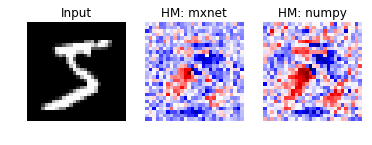

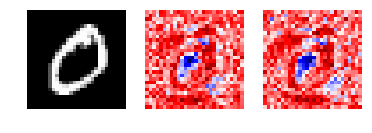

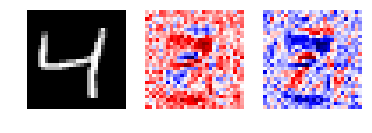

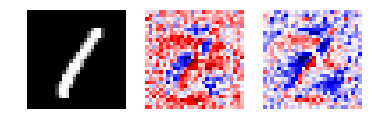

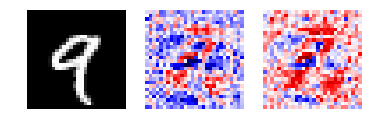

In [14]:
for i in range(num_images_to_show):

    # presentation
    plt.subplot(1,3,1)
    plt.imshow(Xtrain_mx[i].asnumpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

    if i == 0:
        plt.title('Input')
    
    plt.subplot(1,3,2)
    plt.imshow(relevance[i].asnumpy().reshape(28, 28), cmap='seismic')
    plt.axis('off')
    
    if i == 0:
        plt.title('HM: mxnet')
    
    plt.subplot(1,3,3)
    plt.imshow(relevance_np[i].reshape(28, 28), cmap='seismic')
    plt.axis('off')
    
    if i == 0:
        plt.title('HM: numpy')
    
    plt.show()